# Exploration MVP

In [1]:
import acquire as ac
import prepare as prep
import evaluate as ev

import seaborn as sns  # Used in creating visuals and plots
import matplotlib.pyplot as plt  # Used in creating visuals and plots
from scipy import stats  # For stats testing.

import pandas as pd
import numpy as np

In [2]:
zil = ac.zillow_data()

In [3]:
zil = prep.prep_zillow(zil)

In [4]:
zil.head()

,bedrooms,bathrooms,sq_ft,price
0,4,2.0,3633.0,296425.0
1,3,4.0,1620.0,847770.0
2,3,2.0,2077.0,646760.0
3,0,0.0,1200.0,5328.0
4,0,0.0,171.0,6920.0


SPLIT DATA BEFORE EXPLORE

In [5]:
zil, val, test = prep.train_val_test(zil)

### Bedrooms

<Axes: xlabel='price', ylabel='Count'>

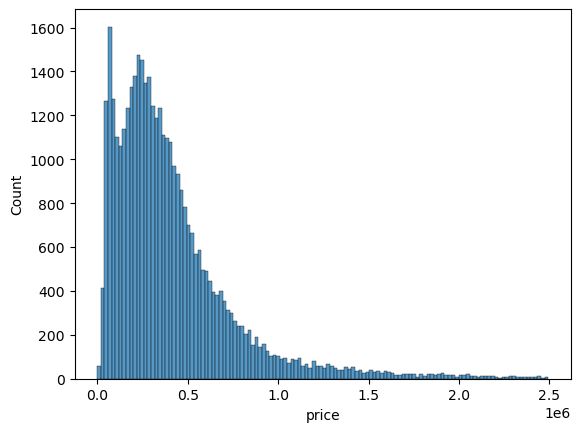

In [6]:
sns.histplot(zil, x='price')

<Axes: xlabel='bedrooms', ylabel='price'>

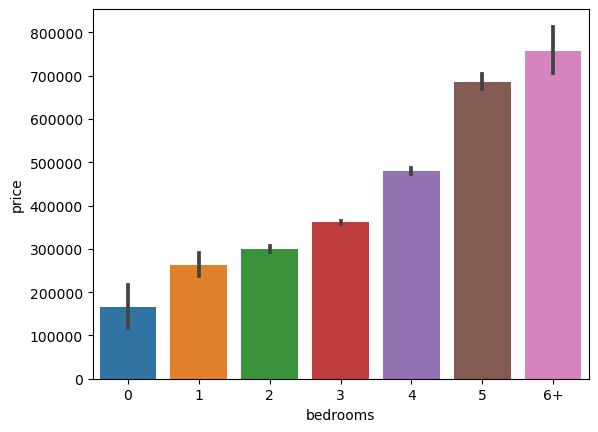

In [7]:
sns.barplot(zil, x='bedrooms', y='price')

In [8]:
for bath in zil.sort_values('bedrooms').bedrooms.unique():
    print(f'{bath}      {zil.price[zil.bedrooms == bath].mean()}')

0      166320.44791666666
1      263095.3333333333
2      299447.46075366135
3      361249.00605126447
4      479990.60641832807
5      686280.083992467
6+      757095.4313304721


Perform stats test to see if houses with more bedrooms and less bedrooms have different costs than the average house

In [9]:
six_plus = zil[zil.bedrooms == '6+'].price
average = zil.price.mean()

In [10]:
average

412297.02267080743

spearmans r same as pearson but non normal distribution

mannwhiteney for non normal distribution

parametric is used to descrive the type of test.

data is normaly distributed




In [11]:
t, p = stats.ttest_1samp(six_plus, average)
t, p

(12.757603397487422, 3.5879894350090036e-32)

In [12]:
ev.check_ttest(t, p)

There is a signifcant result. P-value was 0.0.
T-value was greater than 0. With a value of 12.76.


In [21]:
one_bed = zil[zil.bedrooms == '1'].price

In [22]:
t, p = stats.ttest_1samp(one_bed, average)
ev.check_ttest(t, p)

There is a signifcant result. P-value was 0.0.
T-value was less than 0. With a value of -11.5.


### Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

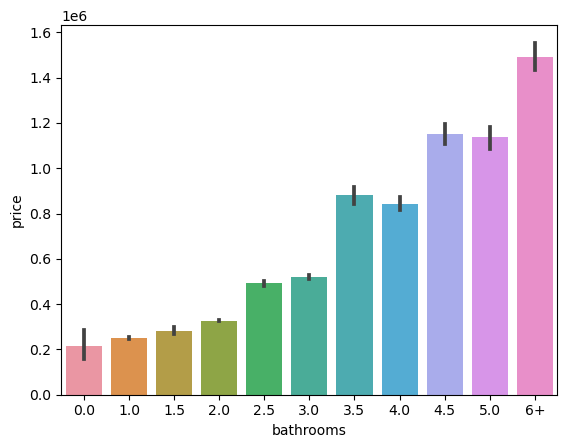

In [13]:
sns.barplot(zil.sort_values('bathrooms'), x='bathrooms', y='price')

In [14]:
zil.sort_values('bathrooms')

,bedrooms,bathrooms,sq_ft,price
38958,0,0.0,675.0,103336.0
3507,0,0.0,1281.0,187179.0
21650,4,0.0,2482.0,695000.0
22069,4,0.0,2578.0,506376.0
32781,2,0.0,1880.0,218527.0
...,...,...,...,...
32952,5,6+,5707.0,896514.0
53258,5,6+,3411.0,911220.0
15819,5,6+,5073.0,790400.0
13827,5,6+,4760.0,2444626.0


In [15]:
zil.bathrooms[zil.bathrooms == bath]

46004    6+
35257    6+
11986    6+
16876    6+
53336    6+
         ..
30713    6+
52327    6+
20500    6+
30131    6+
7810     6+
Name: bathrooms, Length: 303, dtype: object

In [16]:
for bath in zil.sort_values('bathrooms').bathrooms.unique():
    print(f'{bath}      {zil.price[zil.bathrooms == bath].mean()}')

0.0      216324.3673469388
1.0      249658.76842105263
1.5      283514.99266055046
2.0      327134.73089449806
2.5      491409.67858530895
3.0      519258.3853626943
3.5      881309.0772200773
4.0      843268.3316690442
4.5      1150651.507936508
5.0      1136285.8950749466
6+      1491897.6831683167


### Square Feet

<Axes: xlabel='sq_ft', ylabel='price'>

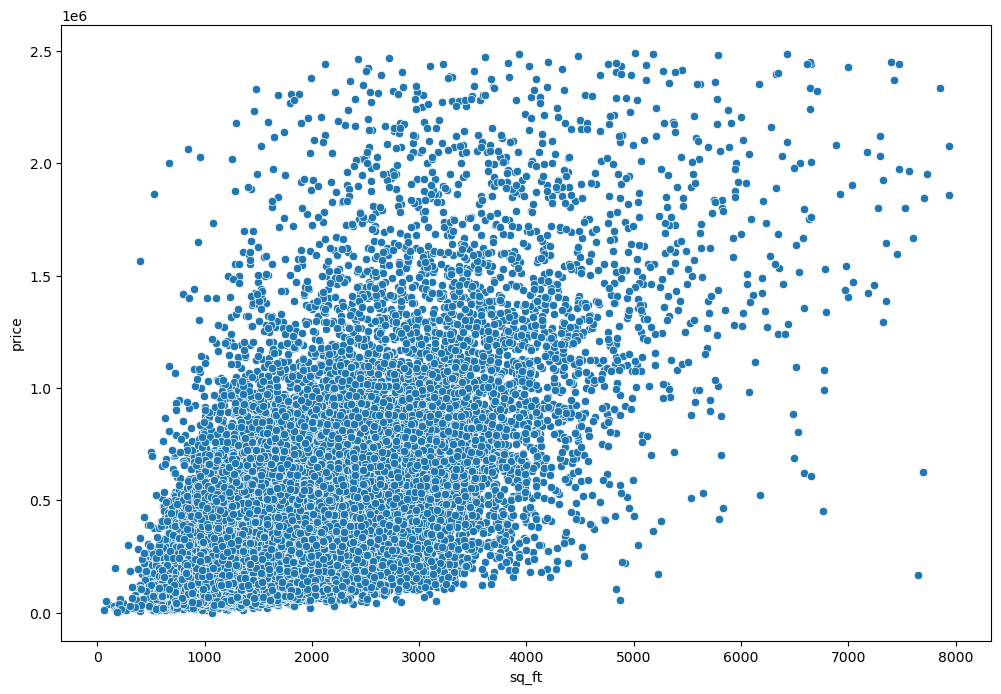

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=zil, x='sq_ft', y='price')

In [18]:
r, p = stats.pearsonr(zil.sq_ft, zil.price)

In [19]:
ev.check_pearson(r,p)

There is a moderate positive correlation. R-value was 0.62.
There is a signifcant result. P-value was 0.0.


In [27]:
zil = ac.zillow_data()

In [29]:
rename = {'bedroomcnt': 'bedrooms',  # Create a dictionary for new column names
                  'bathroomcnt': 'bathrooms',
                  'calculatedfinishedsquarefeet': 'sq_ft',
                  'taxvaluedollarcnt': 'price'}
zil = zil.rename(columns=rename)  # Rename colums using dictionary

In [34]:
len(zil[zil.bedrooms <= 5])/len(zil)

0.9853883894996955

In [39]:
len(zil[zil.bathrooms <= 3.5])/len(zil)

0.9257959388317875

In [44]:
len(zil[zil.sq_ft <= 3700])/len(zil)

0.9572574580095262

In [52]:
len(zil[zil.price <= 1300_000])/len(zil)

0.957167926082441